In [2]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784', version=1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### dataset laoded from scikit learn usually have the same format that is DESCR for discription and data and target containing the arrays of one row per instance and one column per feature and array with the labels respectively

In [3]:
X, y= mnist['data'], mnist['target']

X.shape



(70000, 784)

In [4]:
y.shape

(70000,)

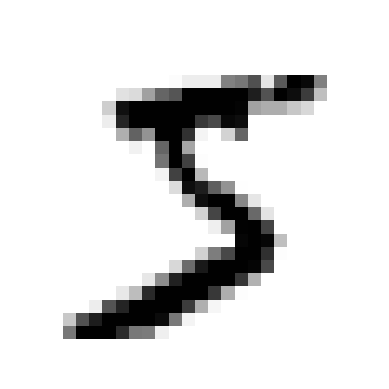

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].to_numpy()  #we use the iloc() to show the data as a numpy instead of an array
some_digit_image= some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
import numpy as np
y = y.astype(np.uint8) #convert to intergers

In [7]:
y[0]

np.uint8(5)

In [8]:

y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [9]:
# split the dataset before further inspection into train test and set it
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### selecting the number 5 using binary classifier

In [10]:
y_train_5= (y_train== 5)
y_test_5= (y_test== 5)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)  

sgd_clf.predict([some_digit])

c:\Users\USER\Desktop\Projects\classification\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### the classifier shows that the 5([True]) an indication that we guessed right in this particular situation

### Performance measures

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)

    print("Fold accuracy:", n_correct / len(y_pred))



Fold accuracy: 0.9669
Fold accuracy: 0.91625
Fold accuracy: 0.96785


#### StratifiedKFold is used to perfom stratified sampling

### Let’s use the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### let’s look at a very dumb classifier that just classifies every single image in the “not-5” class now that all our three accuracy for cross validation are above 93%

In [14]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
# lets now guess the models accuracy

never_5_clf= Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

### Confusion Matrix

In [16]:
# now that we cannot fully depend on accurcy models, confusion matrix is a better method as it shows the confusion in the model instead

from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
# we will now pass the target class(y_train_5) and the predicted class (y_train_pred) in the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

#### Precision and Recall

In [18]:
#sents a predicted class. The first row of this matrix considers non-5 images (the nega‐tive class): 53,057 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).The second row considers the images of 5s (the positive class): 1,325 were wrongly classified as non-5s (false negatives), while the remaining 4,096 were correctly classified as 5s (true positives). A perfect classifier would have only true positives and true`negatives, so its confusion matrix would have nonzero values only on its main diagnal (top left to bottom right):"""

y_train_perfect_predictions= y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [21]:
# It is often convenient to combine precision and recall into a single metric called the F1_score

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343847

In [22]:
# calling our decision_function() method to return for us scores of each instances and make predictions using these score. With all that we will be using our own threshhold
y_score= sgd_clf.decision_function([some_digit])
y_score

c:\Users\USER\Desktop\Projects\classification\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [23]:
threshold= 0
y_some_digit_pred= (y_score > threshold)
y_some_digit_pred

array([ True])

In [24]:
threshold= 8000
y_some_digit_pred= (y_score > threshold)
y_some_digit_pred

array([False])

#### we need to get the score for all our instances using the score_val_predict() but specifying that you want it to return the decion scores instead of predictions

In [25]:
y_score= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                          method= "decision_function")
y_score

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

#### now with these scores we can compute precision and recall for all possible threshold using precision_recall_curve()

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold= precision_recall_curve(y_train_5, y_score)

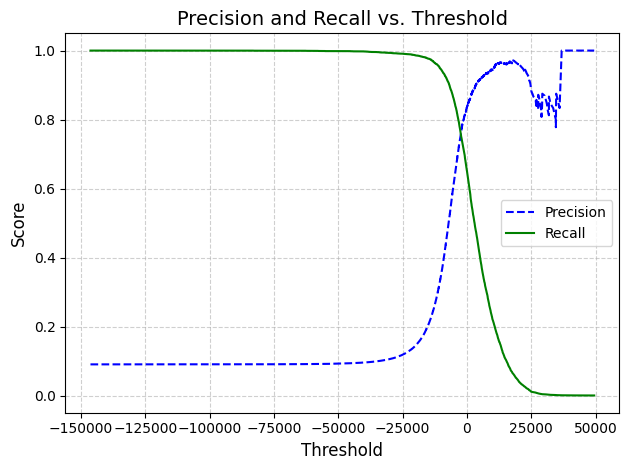

In [27]:
#Finally, you can plot precision and recall as functions of the threshold value using Matplotlib
def plot_precision_recall_vs_threshold(precisions, recalls, threshold):
    plt.plot(threshold, precisions[:-1], "b--", label="Precision"),
    plt.plot(threshold, recalls[:-1], "g-", label= "Recall"),
    plt.title("Precision and Recall vs. Threshold", fontsize=14),
    plt.xlabel("Threshold", fontsize=12),
    plt.ylabel("Score", fontsize=12),
    plt.grid(True, linestyle='--', alpha=0.6),
    plt.legend(loc="best"),
    plt.tight_layout(),

plot_precision_recall_vs_threshold(precisions, recalls, threshold)
plt.show()


##### To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give us the first index of the maximum value, which in this case means the first True value)

In [28]:
threshold_90_precision = threshold[np.argmax(precisions >= 0.90)] # ~7816

# we can now go make the predictions using the below method
y_train_pred_90 = (y_score >= threshold_90_precision)

In [29]:
#Let’s check these predictions’ precision and recall:
precision_score(y_train_5, y_train_pred_90)


0.9000345901072293

In [30]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### ROC Cuerve

In [31]:
# plotting ROC curve, ROC curve plots sensitivity (recall) versus 1 – specificity.
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold= roc_curve(y_train_5, y_score)

roc_auc = roc_auc_score(y_train_5, y_score)

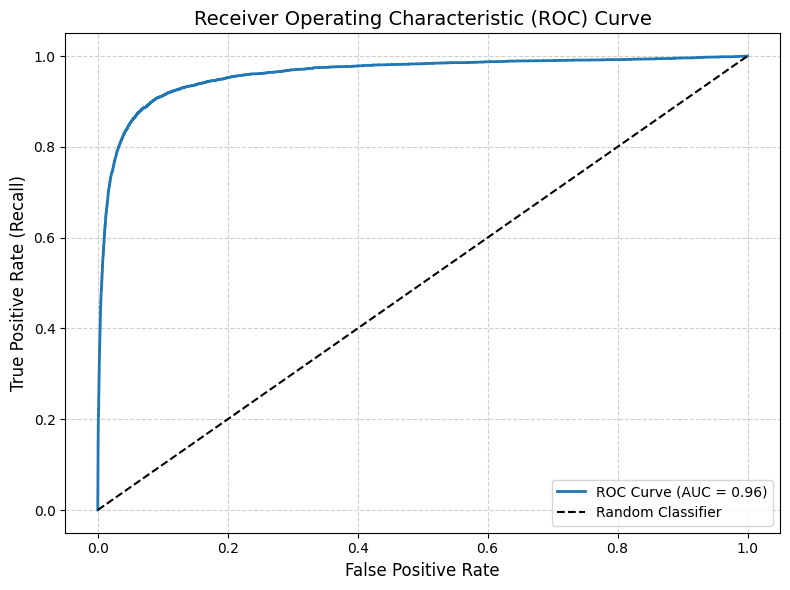

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=label or f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonal line

    # Axis labels, title, legend, and grid
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot the ROC curve
plot_roc_curve(fpr, tpr)


####  compare classifiers using the area under the curve (AUC)

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_score)

0.9604938554008616

#### Tring out binary classifiers for multiclass classifiers(multinomial classifiers)

In [34]:
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

c:\Users\USER\Desktop\Projects\classification\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [35]:
# To see that this is indeed the case, you can call the decision_function() method.Instead of returning just one score per instance, it now returns 10 scores, one per class:

some_digit_scores= sgd_clf.decision_function([some_digit])
some_digit_scores

c:\Users\USER\Desktop\Projects\classification\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

#### The highest one[3] is indeed the one with the highest value, remember the score was to return only the highest

In [36]:
np.argmax(some_digit_scores)

np.int64(3)

#### Let's creates a multi‐class classifier using the OvO strategy, based on a SGDClassifier:

In [37]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf= OneVsOneClassifier(SGDClassifier(random_state=42))

ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

c:\Users\USER\Desktop\Projects\classification\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [38]:
len(ovo_clf.estimators_)

45

#### Training a Random Classifier is just that easy

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

c:\Users\USER\Desktop\Projects\classification\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [ ]:
# predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class:
forest_clf.predict_proba([some_digit])

c:\Users\USER\Desktop\Projects\classification\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

#### . Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score() function:

In [41]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
#if you use a random classifier you would get a 10% accuracy which is not so bad

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### ERROR ANLYSIS

In [43]:
#Here, we will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.

y_train_pred= cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx= confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

#### That’s a lot of numbers. It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:


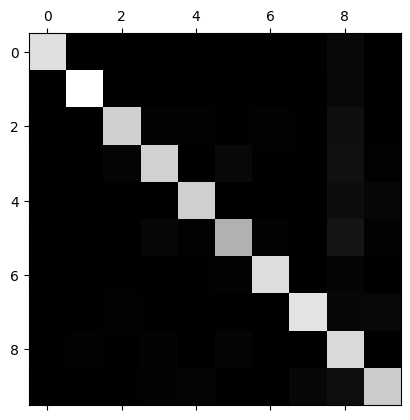

In [44]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad)

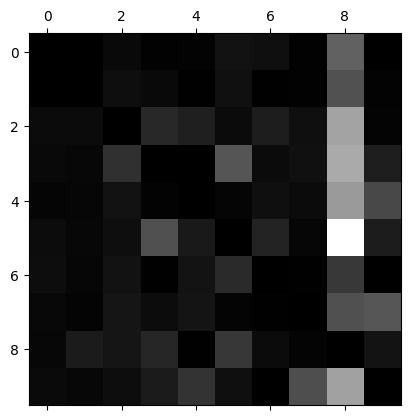

In [45]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx= conf_mx / row_sums

#Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

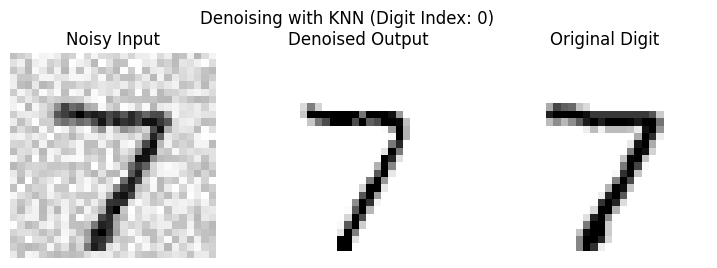

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

# Split training and test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Step 2: Define plot_digits()
def plot_digits(instances, images_per_row=10):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded.reshape((n_rows, images_per_row, size, size)) \
                        .swapaxes(1, 2) \
                        .reshape(n_rows * size, images_per_row * size)
    plt.imshow(image_grid, cmap="binary")
    plt.axis("off")

# Step 3: Add random noise to training and test sets
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))

X_train_noisy = X_train + noise_train
X_test_noisy = X_test + noise_test

# Step 4: Train a KNN classifier to denoise
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_noisy, X_train)  # Train on noisy input, clean output

# Step 5: Pick a noisy test digit and denoise it
digit_index = 0
noisy_digit = X_test_noisy[digit_index]
denoised_digit = knn_clf.predict([noisy_digit])[0]
original_digit = X_test[digit_index]

plt.figure(figsize=(9, 3))
plt.subplot(131); plot_digits([noisy_digit]); plt.title("Noisy Input")
plt.subplot(132); plot_digits([denoised_digit]); plt.title("Denoised Output")
plt.subplot(133); plot_digits([original_digit]); plt.title("Original Digit")
plt.suptitle("Denoising with KNN (Digit Index: 0)")
plt.show()


#### Multilable Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create multilabel targets
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

# Train classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

# Predict multilabel for a sample digit
knn_clf.predict([some_digit])



c:\Users\USER\Desktop\Projects\classification\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [48]:
# Let's e computes the average F1score across all labels
# Evaluating our multilabel classifier
y_train_knn_pred= cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

#### Multioutput Classification

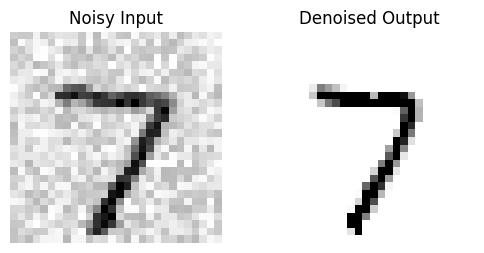

In [64]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Add noise to the training and test images
noise_x = np.random.randint(0, 100, (len(X_train), 784))
noise_y = np.random.randint(0, 100, (len(X_test), 784))

x_train_mod = X_train + noise_x  # Noisy training images
x_test_mod = X_test + noise_y    # Noisy test images

# Step 2: Train the model to map noisy → clean
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_mod, X_train)  # Learn to denoise

# Step 3: Pick a noisy test image and predict the clean version
some_digit = 0
clean_digit = knn_clf.predict([x_test_mod[some_digit]])[0]  # ✅ FIXED

# Step 4: Plot only the clean data
plt.figure(figsize=(6, 3))
plt.subplot(121); plot_digits([x_test_mod[some_digit]]); plt.title("Noisy Input")
plt.subplot(122); plot_digits([clean_digit]); plt.title("Denoised Output")
plt.show()



#### Thank you for following to here, you are a hero, you're great and you can always do better